## Multivariate Analysis

### Overview

Multivariate analysis examines relationships among ALL variables simultaneously, considering their joint distributions, interactions, and combined effects on the outcome.

**Visual Exploration**
- 3D scatterplots of predictors colored by outcome.
- Dimensionality reduction (PCA) → project many predictors into 2D and color by outcome.

### Preparation

#### Separate predictors and outcome

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA

columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
           "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv('pima-indians-diabetes.data.csv', names=columns)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

features = df.drop(columns=["Outcome"])
label = df["Outcome"]

### Visual Exploration

#### Description

- Scatterplots: A way to visualize multivariate data to help classify and understand the relationships among the variables.
- Pairplot: Show all 2D scatter plots of each pair of features chosen from 3D Scatterplots.
- Dimensionality Reduction

#### 3D Scatterplots

This part will illustrate the relationships among three or more variables by visualizing it using 3D Scatterplots.

In order to perform 3D Scatterplots graph, we need to choose 3 features in the dataset.

We could not randomly choose 3 features out of 8 features to visualize it and continue doing that until all of feature combinations are used, as it is waste of time. Instead, we could rely on the result from bivariate analysis, typically the **Correlation heatmap**.

From the result, **Glucose** and **BMI** features have the strongest relationship with the outcome. Because of that, we will choose those as the two first features. For the third feature, we will choose variables that are related to diabete disease among the others. **Pregnancies** and **Age** are the most reliable information, as it has strong relationship with the outcome, so we choose those two, and visualize iteratively.

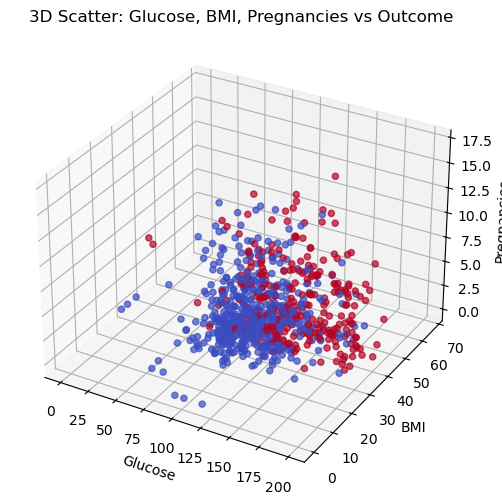

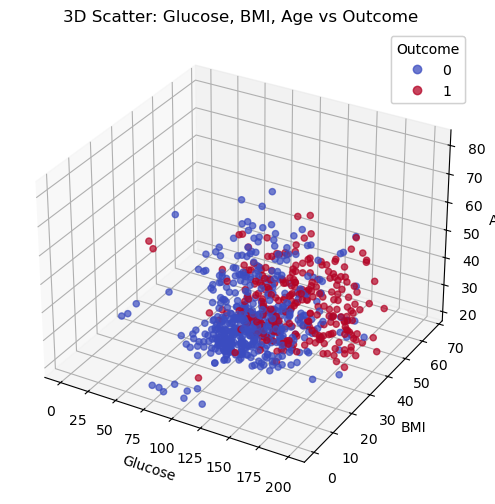

In [ ]:
# assume your dataframe is called df
# predictors

x = df['Glucose']
y = df['BMI']
z1 = df['Pregnancies']
z2 = df['Age']
target = df['Outcome']  # 0 = no diabetes, 1 = diabetes

# 3D scatter: Glucose, BMI, Pregnancies
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(x, y, z1, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Pregnancies')
ax.set_title('3D Scatter: Glucose, BMI, Pregnancies vs Outcome')

# add legend for outcome
# legend = ax.legend(*scatter.legend_elements(), title="Outcome")
# ax.add_artist(legend)

plt.show()

# 3D scatter: Glucose, BMI, Age
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(x, y, z2, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
ax.set_title('3D Scatter: Glucose, BMI, Age vs Outcome')

legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)

plt.show()

The 3D scatterplots show too much overlap from the three chosen features, which can be conclude that three features alone will not fully separate diabetics and non-diabetics. It could be a hint that we should try higher dimensions or smarter approaches.

We will try increase dimensions of the Scatterplots by applying more features into the graph.
We will choose features that have the highest correlation rate with the outcome compared to others
- **4D Scatterplots**: Use all of the chosen features (Glucose, BMI, Pregnancies, Age)
- **5D Scatterplots**: Add DiabetesPedigreeFunction features
- **6D Scatterplots**: Add Insulin features

##### 3D Scatter plots but in a different angle

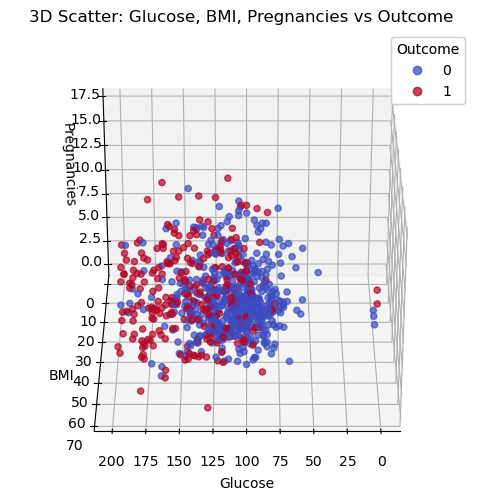

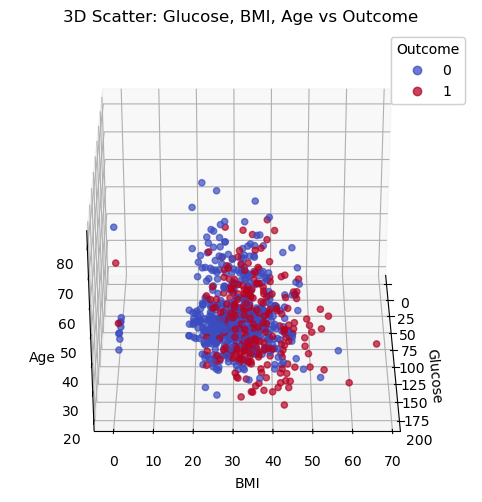

In [29]:
# assume your dataframe is called df
# predictors

x = df['Glucose']
y = df['BMI']
z1 = df['Pregnancies']
z2 = df['Age']
target = df['Outcome']  # 0 = no diabetes, 1 = diabetes

# 3D scatter: Glucose, BMI, Pregnancies
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(x, y, z1, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Pregnancies')
ax.set_title('3D Scatter: Glucose, BMI, Pregnancies vs Outcome')
ax.view_init(elev=30, azim=90)

# add legend for outcome
legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)

plt.show()

# 3D scatter: Glucose, BMI, Age
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(x, y, z2, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
ax.set_title('3D Scatter: Glucose, BMI, Age vs Outcome')
ax.view_init(elev=30, azim=0)

legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)

plt.show()

we can clearly see that if we look from a specific angle (Glucose, Pregnancies, BMI), we could see that at the point that Glucose goes from >= 150, the number of people diagnosed with diabetes was outweight that of non-diabetics.

in the 3D scatter plots (Glucose, Age, BMI), the same thing happens after Glucose figure is larger than 125, but the splitness is not as clear as the other

BMI < 25 => non-diabetics 

##### Check Glucose >= 150

In [66]:
# Analyze specifically the problematic glucose >= 150 range
low_glucose_df = df[df['Glucose'] >= 150].copy()

print(f"Total samples with Glucose >= 150: {len(low_glucose_df)}")
print(f"Diabetes cases in high glucose group: {low_glucose_df['Outcome'].sum()}")
print(f"Percentage with diabetes: {(low_glucose_df['Outcome'].sum() / len(low_glucose_df)) * 100:.1f}%")

# Check which features differentiate best in this subset
correlation_low_glucose = low_glucose_df.corr()['Outcome'].abs().sort_values(ascending=False)
print("\nCorrelations with Outcome in Glucose < 150 subset:")
print(correlation_low_glucose)

Total samples with Glucose >= 150: 143
Diabetes cases in high glucose group: 106
Percentage with diabetes: 74.1%

Correlations with Outcome in Glucose < 150 subset:
Outcome                     1.000000
Glucose                     0.248107
BMI                         0.149393
Insulin                     0.085608
Pregnancies                 0.084478
DiabetesPedigreeFunction    0.081748
SkinThickness               0.038173
BloodPressure               0.029578
Age                         0.008564
Name: Outcome, dtype: float64


##### Check Glucose < 150

In [34]:
# Analyze specifically the problematic glucose < 150 range
low_glucose_df = df[df['Glucose'] < 150].copy()

print(f"Total samples with Glucose < 150: {len(low_glucose_df)}")
print(f"Diabetes cases in low glucose group: {low_glucose_df['Outcome'].sum()}")
print(f"Percentage with diabetes: {(low_glucose_df['Outcome'].sum() / len(low_glucose_df)) * 100:.1f}%")

# Check which features differentiate best in this subset
correlation_low_glucose = low_glucose_df.corr()['Outcome'].abs().sort_values(ascending=False)
print("\nCorrelations with Outcome in Glucose < 150 subset:")
print(correlation_low_glucose)

Total samples with Glucose < 150: 625
Diabetes cases in low glucose group: 162
Percentage with diabetes: 25.9%

Correlations with Outcome in Glucose < 150 subset:
Outcome                     1.000000
Glucose                     0.290183
BMI                         0.258901
Age                         0.224316
Pregnancies                 0.211535
DiabetesPedigreeFunction    0.155254
Insulin                     0.070030
SkinThickness               0.039723
BloodPressure               0.021106
Name: Outcome, dtype: float64


##### 3D Scatterplots (Glucose < 150)

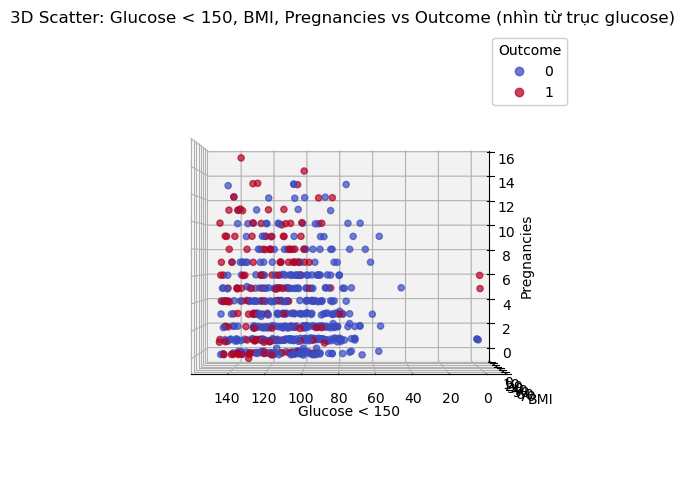

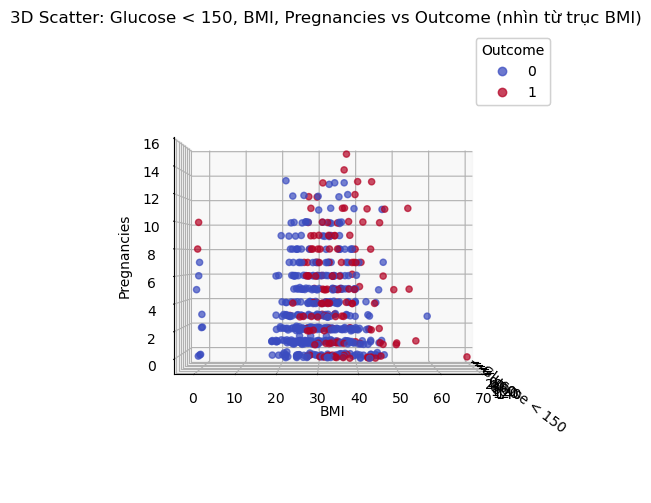

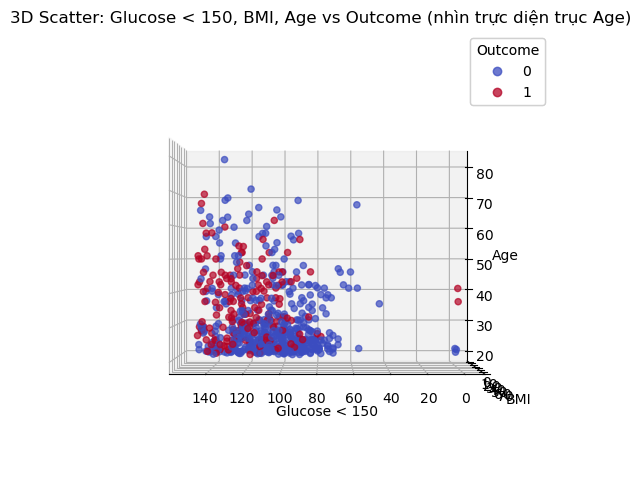

In [65]:
# assume your dataframe is called df
# predictors

x = df[df['Glucose'] < 150]['Glucose']
y = df[df['Glucose'] < 150]['BMI']
z1 = df[df['Glucose'] < 150]['Pregnancies']
z2 = df[df['Glucose'] < 150]['Age']
target = df[df['Glucose'] < 150]['Outcome']  # 0 = no diabetes, 1 = diabetes

# 3D scatter: Glucose, BMI, Pregnancies (look from glucose axis)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(x, y, z1, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose < 150')
ax.set_ylabel('BMI')
ax.set_zlabel('Pregnancies')
ax.set_title('3D Scatter: Glucose < 150, BMI, Pregnancies vs Outcome (nhìn từ trục glucose)')
ax.view_init(elev=0, azim=90)

# add legend for outcome
legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)
plt.show()

# 3D scatter: Glucose, BMI, Pregnancies (look from BMI axis)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(x, y, z1, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose < 150')
ax.set_ylabel('BMI')
ax.set_zlabel('Pregnancies')
ax.set_title('3D Scatter: Glucose < 150, BMI, Pregnancies vs Outcome (nhìn từ trục BMI)')
ax.view_init(elev=0, azim=0)

# add legend for outcome
legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)
plt.show()

# 3D scatter: Glucose, BMI, Age
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(x, y, z2, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose < 150')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
ax.set_title('3D Scatter: Glucose < 150, BMI, Age vs Outcome (nhìn trực diện trục Age)')
ax.view_init(elev=0, azim=90)

legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)

plt.show()

BMI < 26: non diabetics

Glucose <= 100: non diabetics

Age <= 30: non diabetics

##### 3D Scatterplots (Glucose >= 150)

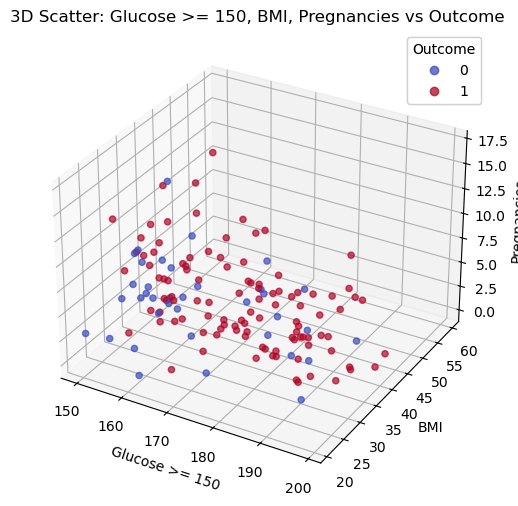

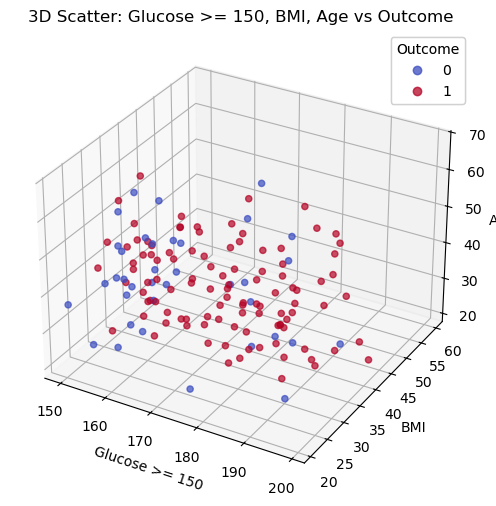

In [60]:
# assume your dataframe is called df
# predictors

x = df[df['Glucose'] >= 150]['Glucose']
y = df[df['Glucose'] >= 150]['BMI']
z1 = df[df['Glucose'] >= 150]['Pregnancies']
z2 = df[df['Glucose'] >= 150]['Age']
target = df[df['Glucose'] >= 150]['Outcome']  # 0 = no diabetes, 1 = diabetes

# 3D scatter: Glucose, BMI, Pregnancies
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(x, y, z1, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose >= 150')
ax.set_ylabel('BMI')
ax.set_zlabel('Pregnancies')
ax.set_title('3D Scatter: Glucose >= 150, BMI, Pregnancies vs Outcome')
# ax.view_init(elev=90, azim=90)

# add legend for outcome
legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)

plt.show()

# 3D scatter: Glucose, BMI, Age
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(x, y, z2, c=target, cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Glucose >= 150')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
ax.set_title('3D Scatter: Glucose >= 150, BMI, Age vs Outcome')
# ax.view_init(elev=90, azim=90)

legend = ax.legend(*scatter.legend_elements(), title="Outcome")
ax.add_artist(legend)

plt.show()

Most of it (about 75%) are diabetics. Lots of overlap

### Summary

- Adding too many features is not always a good thing in training ML models.
- Choosing 5 features Glucose, BMI, Pregnancies, Age, and DiabetesPedigreeFunction is the best option if we want to approach the way that choosing features that impact the outcome most

## The end